# Model ensembling using blending

This is my solution for the kaggle competition:  https://www.kaggle.com/c/porto-seguro-safe-driver-prediction. This solution ranked 138 of 5170 (Top 3%). The goal of this competition is to find out whether a driver will make a claim or not. 

The predictions of the trained models are loaded. Weighted blending is used for ensembling. An optimization algorithm is used to find the best weights for blending using the out-of-fold predictions of the training set.

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [6]:
def gini(actual, pred, cmpcol = 0, sortcol = 1):
    assert( len(actual) == len(pred) )
    all = np.asarray(np.c_[ actual, pred, np.arange(len(actual)) ], dtype=np.float)
    all = all[ np.lexsort((all[:,2], -1*all[:,1])) ]
    totalLosses = all[:,0].sum()
    giniSum = all[:,0].cumsum().sum() / totalLosses
 
    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)
 
def gini_normalized(a, p):
    return gini(a, p) / gini(a, a)

In [9]:
label = ['target']

df_train = pd.read_csv('train.csv')[label]

# Loading predictions

In [10]:
def print_scores(df):
    cols = []
    for c in [col for col in df.columns if col not in ['id']]:
        cols.append(c)
        print('Score: {:0.4f}, Comb: {:0.4f}'.format(gini_normalized(df_train[label], df[c]),
                                                     gini_normalized(df_train[label], np.mean(df[cols], axis = 1))
                                                    ))

## LightGBM

In [11]:
df_preds_lgb = pd.read_csv('Predictions/Base/lgb/test.csv')
df_preds_train_lgb = pd.read_csv('Predictions/Base/lgb/train.csv')

preds_lgb = np.mean(df_preds_lgb.drop('id', axis = 1).values, axis = 1)
preds_tr_lgb = np.mean(df_preds_train_lgb.drop('id', axis = 1).values, axis = 1)

print_scores(df_preds_train_lgb)
print('\nCombined')
print('Score: {:0.4f}'.format(gini_normalized(df_train[label], preds_tr_lgb)))

Score: 0.2868, Comb: 0.2868
Score: 0.2851, Comb: 0.2872
Score: 0.2854, Comb: 0.2874
Score: 0.2858, Comb: 0.2876
Score: 0.2854, Comb: 0.2877
Score: 0.2870, Comb: 0.2880
Score: 0.2861, Comb: 0.2881
Score: 0.2865, Comb: 0.2882
Score: 0.2868, Comb: 0.2883
Score: 0.2869, Comb: 0.2884

Combined
Score: 0.2884


## XGBoost

In [12]:
df_preds_xgb = pd.read_csv('Predictions/Base/xgb/test.csv')
df_preds_train_xgb = pd.read_csv('Predictions/Base/xgb/train.csv')

preds_xgb = np.mean(df_preds_xgb.drop('id', axis = 1).values, axis = 1)
preds_tr_xgb = np.mean(df_preds_train_xgb.drop('id', axis = 1).values, axis = 1)

print_scores(df_preds_train_xgb)
print('\nCombined')
print('Score: {:0.4f}'.format(gini_normalized(df_train[label], preds_tr_xgb)))

Score: 0.2860, Comb: 0.2860
Score: 0.2855, Comb: 0.2868
Score: 0.2864, Comb: 0.2873
Score: 0.2852, Comb: 0.2873
Score: 0.2860, Comb: 0.2874

Combined
Score: 0.2874


## CatBoost

In [13]:
df_preds_cat = pd.read_csv('Predictions/Base/cat/test.csv')
df_preds_train_cat = pd.read_csv('Predictions/Base/cat/train.csv')

preds_cat = np.mean(df_preds_cat.drop('id', axis = 1).values, axis = 1)
preds_tr_cat = np.mean(df_preds_train_cat.drop('id', axis = 1).values, axis = 1)

print_scores(df_preds_train_cat)
print('\nCombined')
print('Score: {:0.4f}'.format(gini_normalized(df_train[label], preds_tr_cat)))

Score: 0.2843, Comb: 0.2843
Score: 0.2856, Comb: 0.2862
Score: 0.2843, Comb: 0.2863
Score: 0.2841, Comb: 0.2863
Score: 0.2845, Comb: 0.2864

Combined
Score: 0.2864


## Regularized Greedy Forest 

In [14]:
df_preds_rgf = pd.read_csv('Predictions/Base/rgf/test.csv')
df_preds_train_rgf = pd.read_csv('Predictions/Base/rgf/train.csv')

preds_rgf = np.mean(df_preds_rgf.drop('id', axis = 1).values, axis = 1)
preds_tr_rgf = np.mean(df_preds_train_rgf.drop('id', axis = 1).values, axis = 1)

print_scores(df_preds_train_rgf)
print('\nCombined')
print('Score: {:0.4f}'.format(gini_normalized(df_train[label], preds_tr_rgf)))

Score: 0.2816, Comb: 0.2816
Score: 0.2810, Comb: 0.2852
Score: 0.2809, Comb: 0.2863
Score: 0.2809, Comb: 0.2871
Score: 0.2818, Comb: 0.2876
Score: 0.2808, Comb: 0.2878
Score: 0.2811, Comb: 0.2880
Score: 0.2811, Comb: 0.2881
Score: 0.2810, Comb: 0.2882
Score: 0.2818, Comb: 0.2884
Score: 0.2830, Comb: 0.2885
Score: 0.2822, Comb: 0.2885

Combined
Score: 0.2885


## Field-Aware Factorization Machine

In [15]:
df_preds_ffm = pd.read_csv('Predictions/Base/ffm/test.csv')
df_preds_train_ffm = pd.read_csv('Predictions/Base/ffm/train.csv')

preds_ffm = np.mean(df_preds_ffm.drop('id', axis = 1).values, axis = 1)
preds_tr_ffm = np.mean(df_preds_train_ffm.drop('id', axis = 1).values, axis = 1)

print_scores(df_preds_train_ffm)
print('\nCombined')
print('Score: {:0.4f}'.format(gini_normalized(df_train[label], preds_tr_ffm)))

Score: 0.2845, Comb: 0.2845
Score: 0.2837, Comb: 0.2852
Score: 0.2832, Comb: 0.2853
Score: 0.2813, Comb: 0.2849
Score: 0.2845, Comb: 0.2853
Score: 0.2844, Comb: 0.2855
Score: 0.2849, Comb: 0.2858
Score: 0.2837, Comb: 0.2858
Score: 0.2838, Comb: 0.2858
Score: 0.2828, Comb: 0.2857
Score: 0.2857, Comb: 0.2859
Score: 0.2852, Comb: 0.2859
Score: 0.2854, Comb: 0.2860
Score: 0.2847, Comb: 0.2860
Score: 0.2847, Comb: 0.2860

Combined
Score: 0.2860


## External Kernels

### Forza Baseline
https://www.kaggle.com/the1owl/forza-baseline

In [16]:
df_preds_FB_lgb = pd.read_csv('Predictions/Base/FB_lgb/test.csv')
df_preds_train_FB_lgb = pd.read_csv('Predictions/Base/FB_lgb/train.csv')

preds_FB_lgb = np.mean(df_preds_FB_lgb.drop('id', axis = 1).values, axis = 1)
preds_tr_FB_lgb = np.mean(df_preds_train_FB_lgb.drop('id', axis = 1).values, axis = 1)

print_scores(df_preds_train_FB_lgb)

print('\nCombined')
print('Score: {:0.4f}'.format(gini_normalized(df_train[label], preds_tr_FB_lgb)))

Score: 0.2834, Comb: 0.2834
Score: 0.2821, Comb: 0.2847
Score: 0.2820, Comb: 0.2851
Score: 0.2836, Comb: 0.2857

Combined
Score: 0.2857


In [17]:
df_preds_FB_xgb = pd.read_csv('Predictions/Base/FB_xgb/test.csv')
df_preds_train_FB_xgb = pd.read_csv('Predictions/Base/FB_xgb/train.csv')

preds_FB_xgb = np.mean(df_preds_FB_xgb.drop('id', axis = 1).values, axis = 1)
preds_tr_FB_xgb = np.mean(df_preds_train_FB_xgb.drop('id', axis = 1).values, axis = 1)

print_scores(df_preds_train_FB_xgb)

print('\nCombined')
print('Score: {:0.4f}'.format(gini_normalized(df_train[label], preds_tr_FB_xgb)))

Score: 0.2851, Comb: 0.2851
Score: 0.2871, Comb: 0.2875
Score: 0.2855, Comb: 0.2877
Score: 0.2844, Comb: 0.2875
Score: 0.2862, Comb: 0.2876
Score: 0.2860, Comb: 0.2876
Score: 0.2864, Comb: 0.2877

Combined
Score: 0.2877


### Keras
https://www.kaggle.com/tilii7/keras-averaging-runs-gini-early-stopping

In [18]:
df_preds_keras = pd.read_csv('Predictions/Base/keras/test.csv')
df_preds_train_keras = pd.read_csv('Predictions/Base/keras/train.csv')

preds_keras = np.mean(df_preds_keras.drop('id', axis = 1).values, axis = 1)
preds_tr_keras = np.mean(df_preds_train_keras.drop('id', axis = 1).values, axis = 1)

print_scores(df_preds_train_keras)

print('\nCombined')
print('Score: {:0.4f}'.format(gini_normalized(df_train[label], preds_tr_keras)))

Score: 0.2670, Comb: 0.2670
Score: 0.2679, Comb: 0.2707
Score: 0.2653, Comb: 0.2715
Score: 0.2692, Comb: 0.2724
Score: 0.2654, Comb: 0.2727
Score: 0.2655, Comb: 0.2728
Score: 0.2652, Comb: 0.2728

Combined
Score: 0.2728


### Regularized Greedy Forest with 20 non-linear features
https://www.kaggle.com/lscoelho/rgf-with-20-nonlinear-features/code

In [19]:
df_preds_rgf20 = pd.read_csv('Predictions/Base/rgf20/test.csv')
df_preds_train_rgf20 = pd.read_csv('Predictions/Base/rgf20/train.csv')

preds_rgf20 = np.mean(df_preds_rgf20.drop('id', axis = 1).values, axis = 1)
preds_tr_rgf20 = np.mean(df_preds_train_rgf20.drop('id', axis = 1).values, axis = 1)

print_scores(df_preds_train_rgf20)

print('\nCombined')
print('Score: {:0.4f}'.format(gini_normalized(df_train[label], preds_tr_rgf20)))

Score: 0.2813, Comb: 0.2813
Score: 0.2799, Comb: 0.2836
Score: 0.2804, Comb: 0.2845
Score: 0.2823, Comb: 0.2856
Score: 0.2812, Comb: 0.2860
Score: 0.2813, Comb: 0.2862
Score: 0.2805, Comb: 0.2863
Score: 0.2829, Comb: 0.2865

Combined
Score: 0.2865


# Correlations between model predictions

In [21]:
all_predictions = [preds_tr_lgb, preds_tr_xgb, preds_tr_cat, preds_tr_rgf, preds_tr_ffm,
                   preds_tr_FB_lgb, preds_tr_FB_xgb,
                   preds_tr_keras.ravel(), preds_tr_rgf20
                  ]
predictions = [preds_lgb, preds_xgb, preds_cat, preds_rgf, preds_ffm,
               preds_FB_lgb, preds_FB_xgb,
               preds_keras.ravel(), preds_rgf20
              ]

model_names = ['lgb', 'xgb', 'cat', 'rgf', 'ffm',
               'FB lgb', 'FB xgb', 
               'keras', 'rgf20'
              ]

In [22]:
df_predictions = pd.DataFrame(all_predictions).transpose()
df_predictions.columns = model_names
df_predictions.head()

,lgb,xgb,cat,rgf,ffm,FB lgb,FB xgb,keras,rgf20
0,0.050280,0.048304,0.046405,0.050150,0.048064,0.046784,0.045440,0.040082,0.041696
1,0.031170,0.030447,0.032324,0.031342,0.030527,0.031679,0.031354,0.036270,0.026810
2,0.018272,0.019857,0.017939,0.019965,0.019222,0.019440,0.020168,0.020319,0.021227
3,0.016012,0.015306,0.016163,0.016281,0.016881,0.014979,0.014867,0.017972,0.013859
4,0.028139,0.026832,0.032260,0.033558,0.032940,0.027628,0.027351,0.023519,0.035102


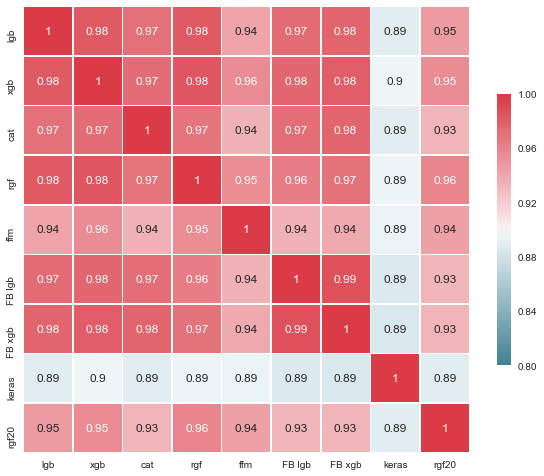

In [31]:
df_predictions = pd.DataFrame(all_predictions).transpose()
df_predictions.columns = model_names
df_predictions.head()
plt.figure(figsize = (10, 10))

corr = df_predictions.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, vmax=1, center=0.9, annot=True, cmap=cmap, 
            square=True, 
            linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

# Blending scores

In [32]:
def find_best_weights(predictions, real, metric, init_weights = None):
    import numpy as np
    le = len(predictions)
    assert(np.shape(predictions)[1] == len(real))
    
    if init_weights == None:
        weights = np.array([1.0] * le)
    else:
        assert(len(init_weights) == le)
        weights = init_weights
        
    for step in [0.5, 0.3, 0.1, 0.05, 0.01]:
        score, best_score = -1, 0
        while(best_score > score):
            score = best_score
            best_score = metric(real, np.average(predictions, weights=weights, axis=0))
            best_index, best_step = -1, 0.0
            for j in range(le):
                delta = np.array([(0 if k != j else step) for k in range(le)])
                s = metric(real, np.average(predictions, weights=weights+delta, axis=0))
                if(s > best_score):
                    best_index, best_score, best_step = j, s, step
                    continue
                if weights[j] - step >= 0:
                    s = metric(real, np.average(predictions, weights=weights-delta, axis=0))
                    if(s > best_score):
                        best_index, best_score, best_step = j, s, -step
            if best_score > score:
                weights[best_index] += best_step
    return weights

In [33]:
blend_weights = find_best_weights(all_predictions, real = df_train[label], metric = gini_normalized,
                                  #init_weights = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
                                 )

print('blending weights:')
for n, w in zip(model_names, blend_weights):
    print('{:0.2f} {}'.format(w, n))
print('-----------------')
print('Comb. Score: {:0.4f}'.format(gini_normalized(df_train[label], 
                                                    np.average(all_predictions, 
                                                               weights = blend_weights, axis = 0))))

blending weights:
2.24 lgb
0.00 xgb
0.00 cat
0.48 rgf
1.79 ffm
0.00 FB lgb
1.05 FB xgb
1.00 keras
1.75 rgf20
-----------------
Comb. Score: 0.2917


# Final prediction

Mean of lgb: 	 0.03638 +- 0.01965
Mean of xgb: 	 0.03646 +- 0.01994
Mean of cat: 	 0.03641 +- 0.01981
Mean of rgf: 	 0.03646 +- 0.01932
Mean of ffm: 	 0.03645 +- 0.02071
Mean of FB lgb: 	 0.03646 +- 0.01952
Mean of FB xgb: 	 0.03644 +- 0.02011
Mean of keras: 	 0.03643 +- 0.01819
Mean of rgf20: 	 0.03672 +- 0.01890


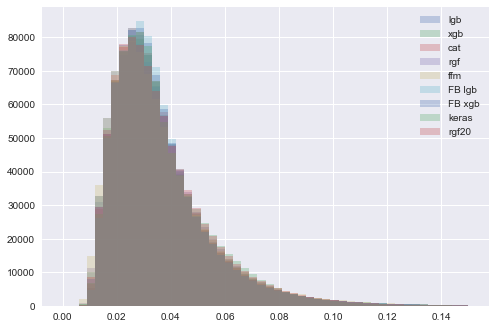

In [34]:
for i, p in enumerate(predictions):
    print('Mean of {}: \t {:0.5f} +- {:0.5f}'.format(model_names[i], np.mean(p), np.std(p)))
    plt.hist(p, range = (0, 0.15), label = model_names[i], bins = 50, histtype = 'bar', alpha = 0.3)
#plt.hist((preds_ups_tr_xgb -0.217)/4.2+0.036, range=(0, 0.5), label = 'test', alpha = 0.5, bins = 50)
plt.legend()
plt.show() 

In [36]:
df_test = pd.read_csv('sample_submission.csv')
df_test.loc[:, 'target'] = 0

df_submission = df_test[['id'] + label].copy()
df_submission.loc[:, label] = np.average(predictions, weights = blend_weights, axis = 0)

df_submission.to_csv('Submissions/submission.csv.gz', index = False, compression = 'gzip', float_format='%.6f')

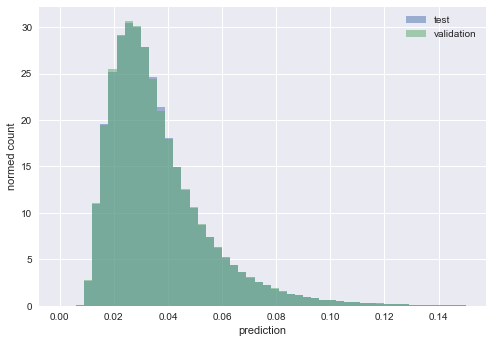

In [37]:
plt.hist(np.average(predictions, weights = blend_weights, axis = 0), label = 'test', range = (0, 0.15), 
         bins = 50, alpha = 0.5, normed = True)
plt.hist(np.average(all_predictions, weights = blend_weights, axis = 0), label = 'validation', range = (0, 0.15), 
         bins = 50, alpha = 0.5, normed = True)
plt.legend()
plt.xlabel('prediction')
plt.ylabel('normed count')
plt.show()

In [38]:
df_test.loc[:, 'target'] = 0

df_submission = df_test[['id'] + label].copy()
for i, p in enumerate(predictions):
    df_submission.loc[:, label] = p
    df_submission.to_csv('Submissions/submission_{}.csv.gz'.format(model_names[i]), index = False, 
                         compression = 'gzip', float_format='%.6f')

# Submission with kaggle mix
https://www.kaggle.com/vpaslay/lb-0-287-porto-seguro-mix
The kagglemix is most likely overfit on the public leaderboard. Nonetheless one final submission is averaged with this kagglemix for safety reasons.

In [39]:
kagglemix = pd.read_csv('Predictions/kagglemix.csv')
kagglemix.head()

,id,target
0,0,0.319118
1,1,0.282084
2,2,0.217847
3,3,0.040522
4,4,0.563168


Mean of kagglemix: 	 0.50000 +- 0.28453
Mean of my models: 	 0.50000 +- 0.28868


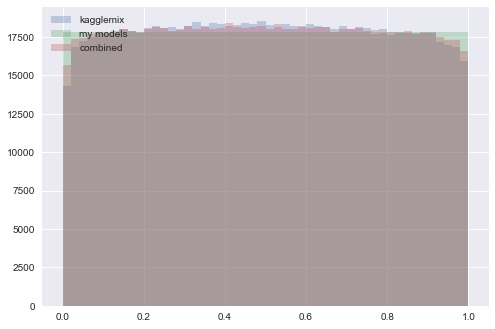

In [40]:
from scipy.stats import rankdata

print('Mean of kagglemix: \t {:0.5f} +- {:0.5f}'.format(np.mean(kagglemix['target'].values), np.std(kagglemix['target'].values)))
plt.hist(kagglemix['target'].values, label = 'kagglemix', bins = 50, histtype = 'bar', alpha = 0.3)

predictions_ranked = rankdata(np.average(predictions, weights = blend_weights, axis = 0))/np.shape(predictions)[1]
print('Mean of my models: \t {:0.5f} +- {:0.5f}'.format(np.mean(predictions_ranked), np.std(predictions_ranked)))
plt.hist(predictions_ranked, label = 'my models', bins = 50, histtype = 'bar', alpha = 0.3)

plt.hist(np.mean([kagglemix['target'].values, predictions_ranked], axis = 0), label = 'combined', bins = 50, histtype = 'bar', alpha = 0.3)

plt.legend()
plt.show() 

In [41]:
df_test.loc[:, 'target'] = 0

df_submission2 = df_test[['id'] + label].copy()
df_submission2.loc[:, label] = np.mean([predictions_ranked, kagglemix['target'].values], axis = 0)

df_submission2.to_csv('submission_kagglemix.csv.gz', index = False, compression = 'gzip', float_format='%.6f')